(956, 774, 3)


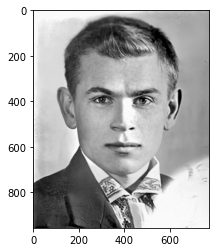

(956, 771, 3)


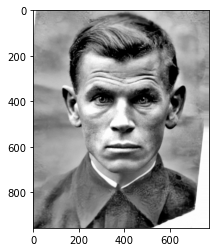

In [11]:
import cv2
import time
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

img1 = cv2.imread(r'C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\4\DIP_HW4\inputs\P4\kobytev_1941.png')
img2 = cv2.imread(r'C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\4\DIP_HW4\inputs\P4\kobytev_1945.png')
print(img1.shape)
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()

print(img2.shape)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
blank = np.zeros(img1.shape, dtype=np.uint8)
blank[:img2.shape[0], :img2.shape[1]] = img2
img2 = blank
img1.shape, img2.shape

((956, 774, 3), (956, 774, 3))

In [8]:
def naive_method(img1, img2, cnt):
    results = []
    names = []
    for alpha in np.linspace(0, 1, cnt):
        alpha = round(alpha, 1)
        naive_res = cv2.addWeighted(img1, 1 - alpha, img2, alpha, 0)
        results.append(naive_res)
        names.append('({} * img1) + ({} * img2)'.format(alpha, round(1 - alpha, 1)))
    return results, names

In [9]:
def plotter(images, names=None, subplots=None, gray=False):
    if subplots is None:
        plt.figure(figsize=(5, 6))
        plt.imshow(images, cmap='gray') if gray else plt.imshow(images)
        plt.title(names)
        plt.axis('off')
    else:
        fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(subplots[1] * 5, subplots[0] * 6))
        for i, (img, name, ax) in enumerate(zip(images, names, fig.axes)):
            ax.imshow(img, cmap='gray') if gray else ax.imshow(img)
            ax.set_title(name)
            ax.axis('off')
    plt.show()

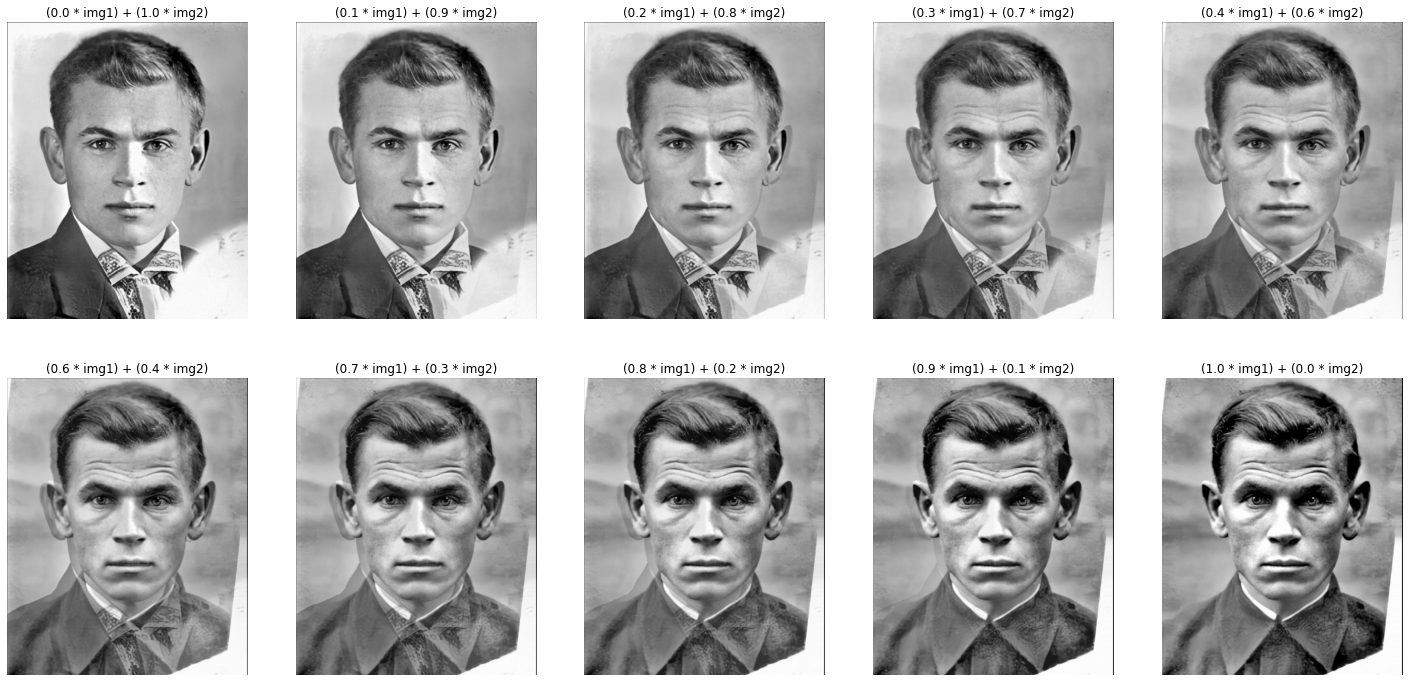

In [13]:

naive_results, naive_names = naive_method(img1, img2, 10)
plotter(naive_results, naive_names, subplots=(2, 5))

In [1]:
import cv2
import time
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')





from PIL import Image
from pylab import *
img = array(Image.open(r'C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\4\DIP_HW4\inputs\P4\kobytev_1941.png'))
imshow(img)
print('Please click 26 point')
x = ginput(20,timeout=-1)
print('you clicked:', x)

with open('first_photo.txt', 'w') as fp:
    fp.write('\n'.join('%s %s' % x for x in x))
fp.close()
img = array(Image.open(r'C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\4\DIP_HW4\inputs\P4\kobytev_1945.png'))
imshow(img)
print('Please click 3 point')
y = ginput(20,timeout=-1)
print('you clicked:', y)
with open('second_image.txt', 'w') as fp:
    fp.write('\n'.join('%s %s' % x for x in y))
fp.close()


Please click 26 point
you clicked: [(296.80905077262685, 392.73325974981594), (494.65673289183223, 392.73325974981594), (323.18874172185417, 586.1843267108168), (393.53458425312715, 599.3741721854304), (459.4838116261956, 594.9775570272259), (389.1379690949226, 691.7030905077262), (393.53458425312715, 498.25202354672547), (380.3447387785135, 216.86865342163355), (164.91059602648988, 427.9061810154525), (586.985651214128, 432.30279617365704), (244.04966887417208, 194.88557763061067), (534.2262693156731, 186.09234731420156), (551.8127299484916, 594.9775570272259), (494.65673289183223, 665.3233995584989), (288.01582045621774, 674.116629874908), (213.2733627667401, 603.770787343635), (6.63245033112571, 10.227740986019171), (767.246872700515, 5.831125827814503), (767.246872700515, 951.1033848417953), (2.2358351729210426, 946.7067696835908)]
Please click 3 point
you clicked: [(304.10228108903596, 392.73325974981594), (488.76011773362745, 392.73325974981594), (321.68874172185417, 599.37417218

In [1]:
import csv
import cv2
import os, sys
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
from subprocess import Popen, PIPE
from PIL import Image
from scipy.spatial import Delaunay
import argparse
from subprocess import Popen, PIPE


first_points=np.empty((20,2),dtype=np.float64)

with open('first_photo.txt', newline='\n') as f:
    reader = csv.reader(f, delimiter=' ')
    j=-1
    for i in reader:
        j+=1
        A = [float(x) for x in i]
        first_points[j][0] = A[0]
        first_points[j][1] = A[1]

print("rouhani_points:\n",first_points)

second_points=np.empty((20,2),dtype=np.float64)

with open('second_image.txt', newline='\n') as f:
    reader = csv.reader(f, delimiter=' ')
    j=-1
    for i in reader:
        j+=1
        A = [float(x) for x in i]
        second_points[j][0] = A[0]
        second_points[j][1] = A[1]

print("second_points:\n",second_points)


rouhani_points:
 [[296.80905077 392.73325975]
 [494.65673289 392.73325975]
 [323.18874172 586.18432671]
 [393.53458425 599.37417219]
 [459.48381163 594.97755703]
 [389.13796909 691.70309051]
 [393.53458425 498.25202355]
 [380.34473878 216.86865342]
 [164.91059603 427.90618102]
 [586.98565121 432.30279617]
 [244.04966887 194.88557763]
 [534.22626932 186.09234731]
 [551.81272995 594.97755703]
 [494.65673289 665.32339956]
 [288.01582046 674.11662987]
 [213.27336277 603.77078734]
 [  6.63245033  10.22774099]
 [767.2468727    5.83112583]
 [767.2468727  951.10338484]
 [  2.23583517 946.70676968]]
raisi_points:
 [[3.04102281e+02 3.92733260e+02]
 [4.88760118e+02 3.92733260e+02]
 [3.21688742e+02 5.99374172e+02]
 [3.92034584e+02 5.99374172e+02]
 [4.62380427e+02 6.03770787e+02]
 [3.92034584e+02 6.87306475e+02]
 [3.92034584e+02 4.98252024e+02]
 [3.92034584e+02 2.34455114e+02]
 [1.94186902e+02 4.27906181e+02]
 [6.03072112e+02 4.27906181e+02]
 [2.51342899e+02 1.90488962e+02]
 [5.32726269e+02 1.81695

(956, 774, 4)


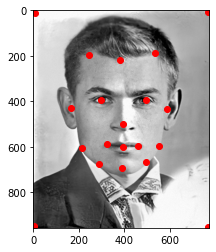

In [2]:

image1 = plt.imread(r'C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\4\DIP_HW4\inputs\P4\kobytev_1941.png')
print(image1.shape)
if len(image1.shape) > 2 and image1.shape[2] == 4:
    #convert the image from RGBA2RGB
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGRA2BGR)
plt.imshow(image1)
for i in range(20):

    plt.plot(first_points[i][0], first_points[i][1], 'ro')
#
plt.show()

(956, 771, 4)


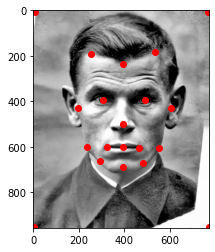

In [3]:


image2 = plt.imread(r'C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\4\DIP_HW4\inputs\P4\kobytev_1945.png')
print(image2.shape)

if len(image2.shape) > 2 and image2.shape[2] == 4:
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGRA2BGR)

plt.imshow(image2)
for i in range(20):

    plt.plot(second_points[i][0], second_points[i][1], 'ro')
#
plt.show()

In [4]:


def applyAffineTransform(src, srcTri, dstTri, size):
    # Given a pair of triangles, find the affine transform.
    warpMat = cv2.getAffineTransform(np.float32(srcTri), np.float32(dstTri))

    # Apply the Affine Transform just found to the src image
    dst = cv2.warpAffine(src, warpMat, (size[0], size[1]), None, flags=cv2.INTER_LINEAR,
                         borderMode=cv2.BORDER_REFLECT_101)

    return dst


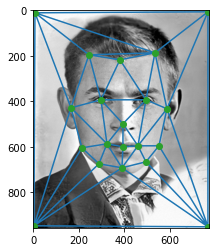

In [5]:


tri_first = Delaunay(first_points)

image = plt.imread(r'C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\4\DIP_HW4\inputs\P4\kobytev_1941.png')
plt.imshow(image)
plt.triplot(first_points[:,0], first_points[:,1], tri_first.simplices)
plt.plot(first_points[:,0], first_points[:,1], 'o')
plt.show()



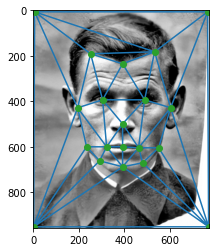

In [6]:


tri_second = Delaunay(second_points)

image = plt.imread(r'C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\4\DIP_HW4\inputs\P4\kobytev_1945.png')
plt.imshow(image)
plt.triplot(second_points[:,0], second_points[:,1], tri_second.simplices)
plt.plot(second_points[:,0], second_points[:,1], 'o')
plt.show()


In [7]:

totalImages=int(0.5*60)

theResult=np.zeros(image1.shape, dtype=image1.dtype)

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

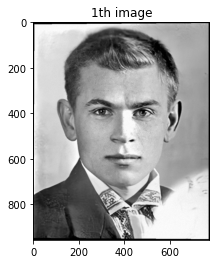

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

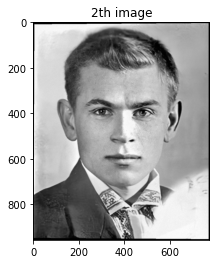

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

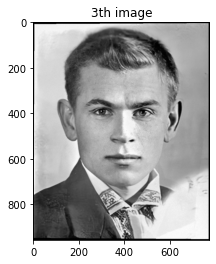

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

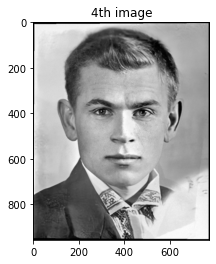

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

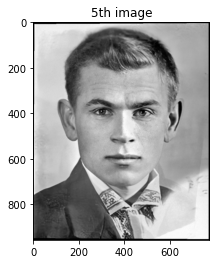

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

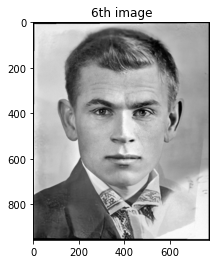

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

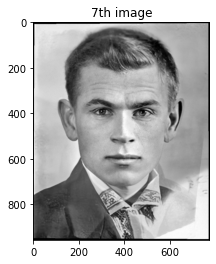

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

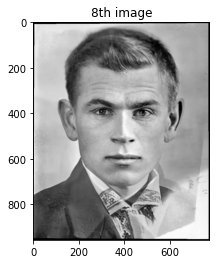

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

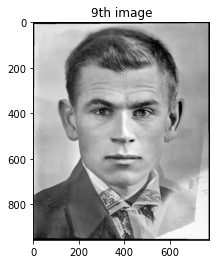

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

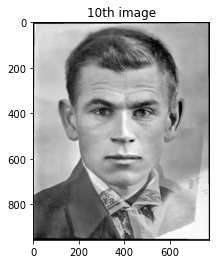

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

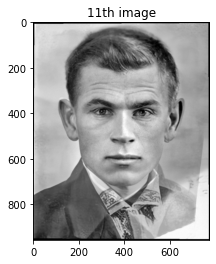

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

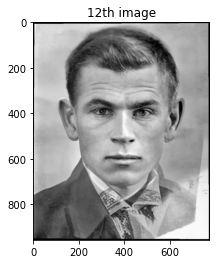

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

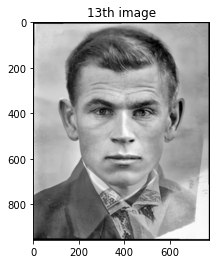

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

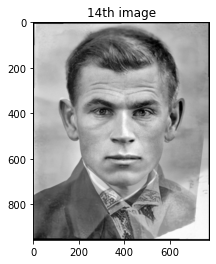

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

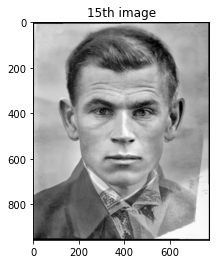

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

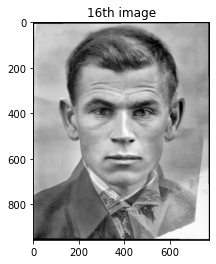

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

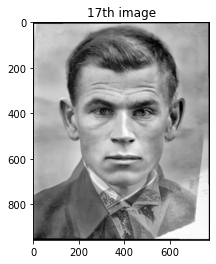

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

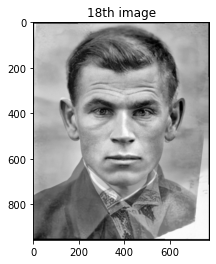

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

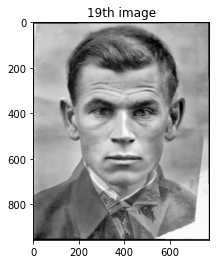

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

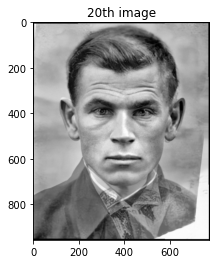

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

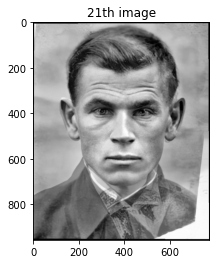

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

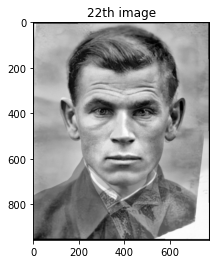

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

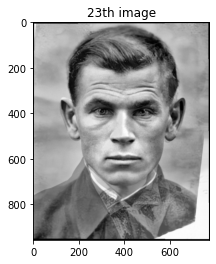

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

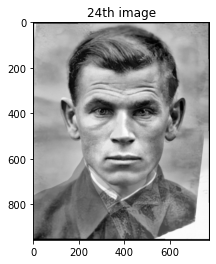

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

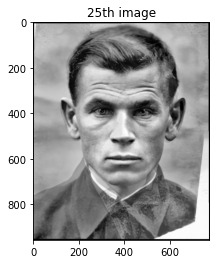

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

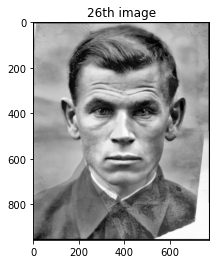

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

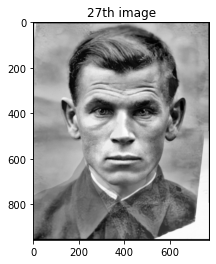

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

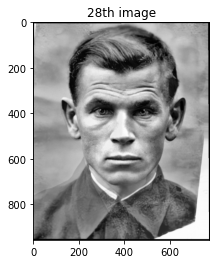

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

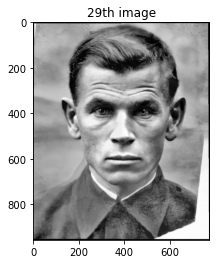

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

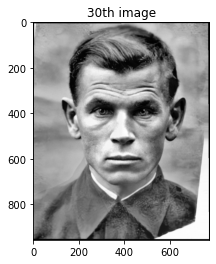

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

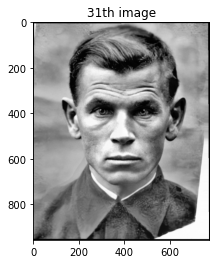

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

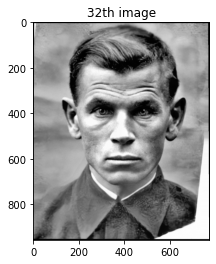

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

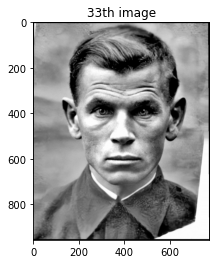

indices of triangle
 [[ 5 18 19]
 [18  9 17]
 [11 16 17]
 [ 9 11 17]
 [12  9 18]
 [11 10 16]
 [ 1 11  9]
 [ 5 13 18]
 [13 12 18]
 [14  2  5]
 [ 2 14 15]
 [14  5 19]
 [15 14 19]
 [10  8 16]
 [16  8 19]
 [ 8 15 19]
 [ 8  2 15]
 [12  4  9]
 [ 4  1  9]
 [ 1  4  6]
 [13  4 12]
 [ 4 13  5]
 [ 0  1  6]
 [ 0  8 10]
 [ 2  0  6]
 [ 8  0  2]
 [ 2  3  5]
 [ 3  4  5]
 [ 3  2  6]
 [ 4  3  6]
 [ 1  7 11]
 [ 0  7  1]
 [ 7 10 11]
 [ 7  0 10]]
(34, 3)
iput_tri
 [[389.13797  691.70306 ]
 [767.2469   951.1034  ]
 [  2.235835 946.7068  ]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[3.9203458e+02 6.8730646e+02]
 [7.7014349e+02 9.5110339e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[767.2469    951.1034   ]
 [586.98566   432.3028   ]
 [767.2469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469      5.8311257]]
output_tri
 [[770.1435    951.1034   ]
 [603.0721    427.9062   ]
 [765.7469  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iput_tri
 [[  6.63245   10.227741]
 [164.9106   427.9062  ]
 [  2.235835 946.7068  ]]
output_tri
 [[5.1324501e+00 5.8311257e+00]
 [1.9418690e+02 4.2790619e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[5.1324501e+00 5.8311257e+00]
 [1.9418690e+02 4.2790619e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[164.9106   427.9062  ]
 [213.27336  603.7708  ]
 [  2.235835 946.7068  ]]
output_tri
 [[1.9418690e+02 4.2790619e+02]
 [2.3375644e+02 5.9937415e+02]
 [7.3583519e-01 9.5110339e+02]]
output_tri
 [[1.9418690e+02 4.2790619e+02]
 [2.3375644e+02 5.9937415e+02]
 [7.3583519e-01 9.5110339e+02]]
iput_tri
 [[164.9106  427.9062 ]
 [323.18875 586.1843 ]
 [213.27336 603.7708 ]]
output_tri
 [[194.1869  427.9062 ]
 [321.68875 599.37415]
 [233.75644 599.37415]]
output_tri
 [[194.1869  427.9062 ]
 [321.68875 599.37415]
 [233.75644 599.37415]]
iput_tri
 [[551.81274 594.97754]
 [459.48383 594.97754]
 [586.98566 432.3028 ]]
output_tri
 [[550.31274 603.7708 ]
 [462.38043 603.7708 ]
 [603.0721  427.9062 ]

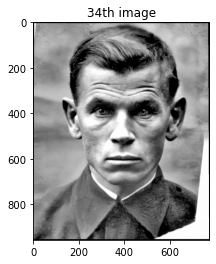

In [8]:

for j in range(0,34):
    morphed_points=np.empty((20,2),dtype=np.float64)

    alpha = j / (33 - 1)

    for i in range(20):
        morphed_points[i][0]=(1-alpha)*first_points[i][0]+alpha*second_points[i][0]
        morphed_points[i][1] = (1 - alpha) * first_points[i][1] + alpha * second_points[i][1]


    tri_morphed=Delaunay(morphed_points)

    print("indices of triangle\n",tri_first.simplices)

    print((tri_first.simplices).shape)



    imgMorph = np.zeros(image1.shape, dtype=image1.dtype)
    for i in range(34):
        indice1=tri_first.simplices[i][0]
        indice2=tri_first.simplices[i][1]
        indice3=tri_first.simplices[i][2]
        input_tri = np.empty((3, 2), dtype=np.float32)
        input_tri[0][:]=first_points[indice1][:]
        input_tri[1][:]=first_points[indice2][:]
        input_tri[2][:]=first_points[indice3][:]

        print("iput_tri\n",input_tri)

        output_tri=np.empty((3,2),dtype=np.float32)

        output_tri[0][:]=second_points[indice1][:]
        output_tri[1][:]=second_points[indice2][:]
        output_tri[2][:]=second_points[indice3][:]

        print("output_tri\n",output_tri)

        morphed_tri = np.empty((3, 2), dtype=np.float32)

        morphed_tri[0][:] = morphed_points[indice1][:]
        morphed_tri[1][:] = morphed_points[indice2][:]
        morphed_tri[2][:] = morphed_points[indice3][:]

        print("output_tri\n", output_tri)


        r1 = cv2.boundingRect(np.float32([input_tri]))
        r2 = cv2.boundingRect(np.float32([output_tri]))
        r = cv2.boundingRect(np.float32([morphed_tri]))


        # Offset points by left top corner of the respective rectangles
        t1Rect = []
        t2Rect = []
        tRect = []


        for i in range(0, 3):
            tRect.append(((morphed_tri[i][0] - r[0]),(morphed_tri[i][1] - r[1])))
            t1Rect.append(((input_tri[i][0] - r1[0]),(input_tri[i][1] - r1[1])))
            t2Rect.append(((output_tri[i][0] - r2[0]),(output_tri[i][1] - r2[1])))


        # Get mask by filling triangle
        mask = np.zeros((r[3], r[2], 3), dtype = np.float32)
        cv2.fillConvexPoly(mask, np.int32(tRect), (1.0, 1.0, 1.0), 16, 0)

        # Apply warpImage to small rectangular patches
        img1Rect = image1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]
        img2Rect = image2[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]]

        size = (r[2], r[3])
        warpImage1 = applyAffineTransform(img1Rect, t1Rect, tRect, size)
        warpImage2 = applyAffineTransform(img2Rect, t2Rect, tRect, size)

        # Alpha blend rectangular patches
        imgRect = (1.0 - alpha) * warpImage1 + alpha * warpImage2

        # Copy triangular region of the rectangular patch to the output image
        imgMorph[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] = imgMorph[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] * ( 1 - mask ) + imgRect * mask

    plt.imshow(imgMorph)
    plt.title(str(j+1)+"th image")
    plt.show()
    cv2.imshow("morphed",cv2.cvtColor(imgMorph,cv2.COLOR_BGR2RGB))
    cv2.waitKey(100)


In [12]:


size = image.shape
rect = (0, 0, size[1], size[0])
subdiv  = cv2.Subdiv2D(rect)
def rect_contains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True
def draw_point(img, p, color ) :
    cv2.circle( img, p, 2, color, cv2.FILLED, cv2.LINE_AA, 0 )


In [13]:

def draw_delaunay(img, subdiv, delaunay_color ) :
#
    triangleList = subdiv.getTriangleList()
    size = img.shape
    r = (0, 0, size[1], size[0])
    print("\n""triangle list",triangleList,"\n")
    for t in triangleList :
        pt1 = (int(t[0]), int(t[1]))
        pt2 = (int(t[2]), int(t[3]))
        pt3 = (int(t[4]), int(t[5]))
        pts=[]
        print('-----------------',pt1)
        pts.append(pt1)
        pts.append(pt2)
        pts.append(pt3)
        print(pts)
        if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
            cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)


In [14]:

# # Draw voronoi diagram
def draw_voronoi(img, subdiv) :
    ( facets, centers) = subdiv.getVoronoiFacetList([])
    for i in range(0,len(facets)) :
        ifacet_arr = []
        for f in facets[i] :
            ifacet_arr.append(f)
        ifacet = np.array(ifacet_arr, np.int)
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        cv2.fillConvexPoly(img, ifacet, color, cv2.LINE_AA, 0)
        ifacets = np.array([ifacet])
        cv2.polylines(img, ifacets, True, (0, 0, 0), 1, cv2.LINE_AA, 0)
        cv2.circle(img, (centers[i][0], centers[i][1]), 3, (0, 0, 0), cv2.FILLED, cv2.LINE_AA, 0)


In [ ]:

if __name__ == '__main__':
#
    # Define window names
    win_delaunay = "Delaunay Triangulation"
    win_voronoi = "Voronoi Diagram"

    animate = True
    delaunay_color = (255,255,255)
    points_color = (0, 0, 255)
    img = cv2.imread(r'C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\4\DIP_HW4\inputs\P4\kobytev_1941.png')
    img_orig = cv2.imread(r'C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\4\DIP_HW4\inputs\P4\kobytev_1941.png')

    size = img.shape
    rect = (0, 0, size[1], size[0])

    subdiv = cv2.Subdiv2D(rect)

    points = []
    with open("first_photo.txt") as file :
        for line in file :
            x, y = line.split()
            points.append((int(float(x)), int(float(y))))
    for p in points :
        subdiv.insert(p)
#
        # Show animation
        if animate :
            img_copy = img_orig.copy()
            # Draw delaunay triangles
            draw_delaunay( img_copy, subdiv, (255, 255, 255) )
            cv2.imshow(win_delaunay, img_copy)
            cv2.waitKey(100)
#
    # Draw delaunay triangles
    draw_delaunay( img, subdiv, (255, 255, 255) )
#
    # Draw points
    for p in points :
        draw_point(img, p, (0,0,255))
#
    # Allocate space for Voronoi Diagram
    # img_voronoi = np.zeros(img.shape, dtype = img.dtype)
    #
    # # Draw Voronoi diagram
    # draw_voronoi(img_voronoi,subdiv)
    #
    # # Show results
    cv2.imshow(win_delaunay,img)
    # cv2.imshow(win_voronoi,img_voronoi)
    cv2.waitKey(0)
    print("\n""second_image""\n")
    win_delaunay = "Delaunay Triangulation"
    win_voronoi = "Voronoi Diagram"
    animate = True
    delaunay_color = (255, 255, 255)
    points_color = (0, 0, 255)

    img = cv2.imread(r'C:\Users\Asus\Desktop\AUT\Semister 2\DIP\EX\4\DIP_HW4\inputs\P4\kobytev_1945.png')

    img_orig = img.copy()

    size = img.shape
    rect = (0, 0, size[1], size[0])
    subdiv = cv2.Subdiv2D(rect)

    points = []
    with open("second_image.txt") as file:
        for line in file:
            x, y = line.split()
            points.append((int(float(x)), int(float(y))))
    for p in points:
        subdiv.insert(p)
        if animate:
            img_copy = img_orig.copy()
            # Draw delaunay triangles
            draw_delaunay(img_copy, subdiv, (255, 255, 255))
            cv2.imshow(win_delaunay, img_copy)
            cv2.waitKey(100)
    draw_delaunay(img, subdiv, (255, 255, 255))
    # Draw points
    for p in points:
        draw_point(img, p, (0, 0, 255))
    cv2.imshow(win_delaunay, img)
    cv2.waitKey(0)
